In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
merged = pd.read_csv(r"..\Data\03_final\final.csv")


In [3]:
output = []

for column in merged.columns:

    null_values  = np.sum(pd.isna(merged[column]))
    unique = merged[column].nunique()
    column_data_type = merged[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = merged.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,0,3000888,int64,3000888.0,1.500444e+06,866281.891642,0.00,750221.75,1.500444e+06,2.250665e+06,3000887.00
id,0,3000888,float64,3000888.0,1.500444e+06,866281.891642,0.00,750221.75,1.500444e+06,2.250665e+06,3000887.00
date,0,1684,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,0,54,float64,3000888.0,2.750000e+01,15.585787,1.00,14.00,2.750000e+01,4.100000e+01,54.00
family,0,33,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales,0,379610,float64,3000888.0,3.577757e+02,1101.997721,0.00,0.00,1.100000e+01,1.958473e+02,124717.00
onpromotion,0,362,float64,3000888.0,2.602770e+00,12.218882,0.00,0.00,0.000000e+00,0.000000e+00,741.00
city,0,22,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,0,16,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,0,5,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Train and Stores

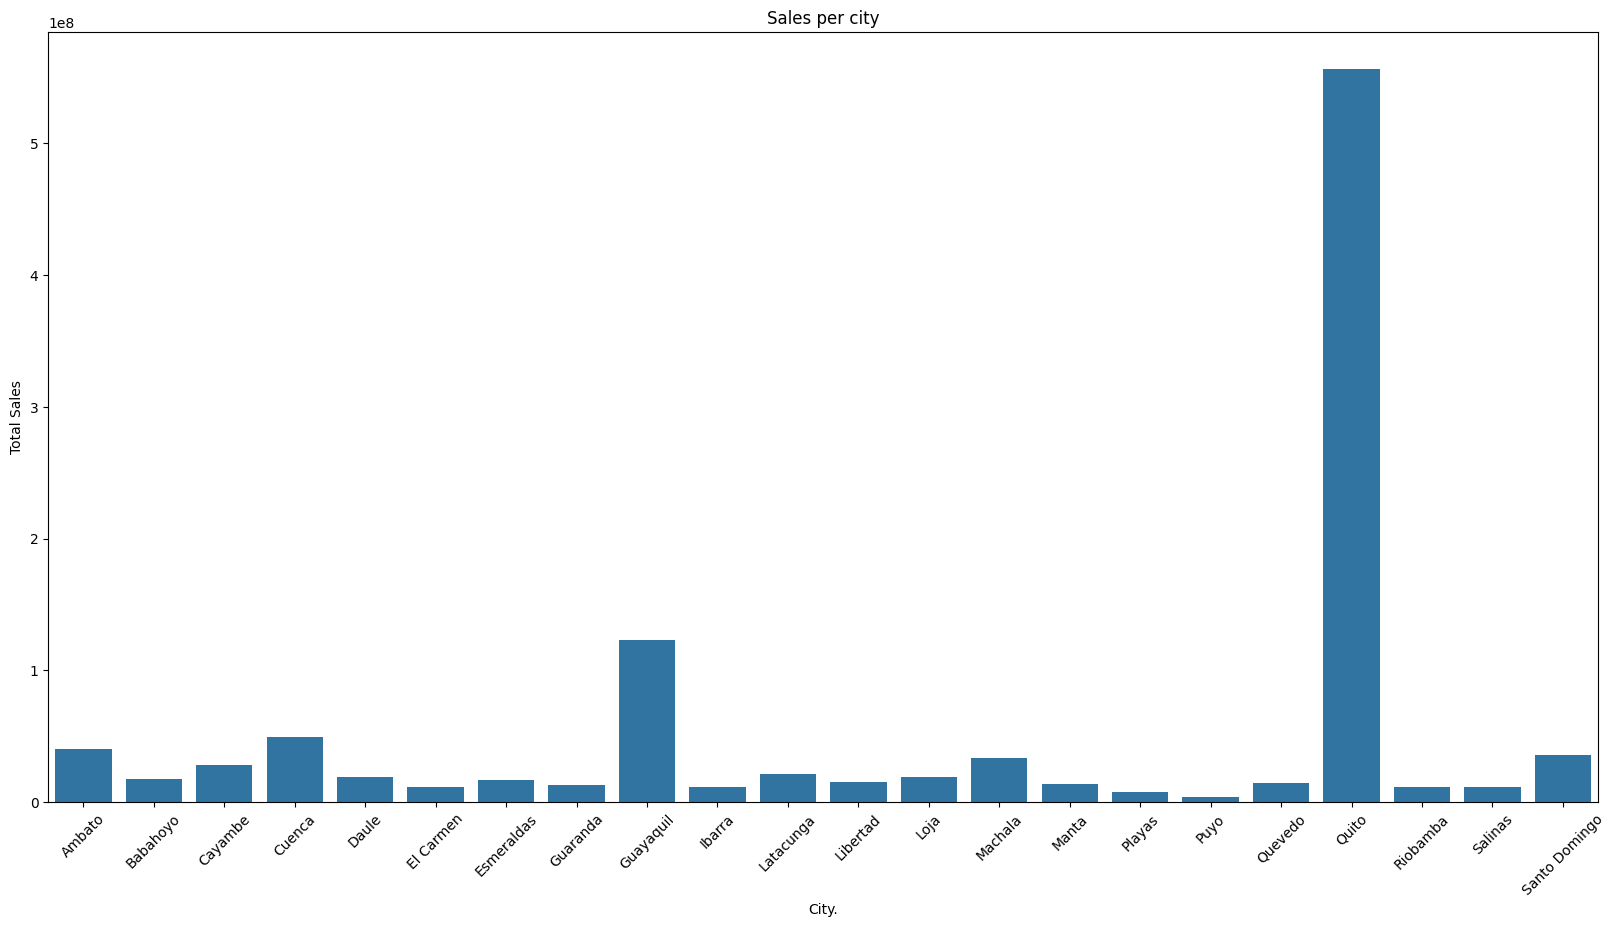

In [4]:
sales_by_city=merged.groupby('city')['sales'].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x = "city", y= "sales", data = sales_by_city)
plt.xticks(rotation = 45)
plt.title('Sales per city')
plt.ylabel('Total Sales')
plt.xlabel('City.')
plt.show()

1. Quito has highest number of sales as it has most number of stores and it is the capital city of Ecuador. 
2. Followed by Quito is Guayaquil which is a popular tourist destination.

<Axes: xlabel='store_nbr', ylabel='sales'>

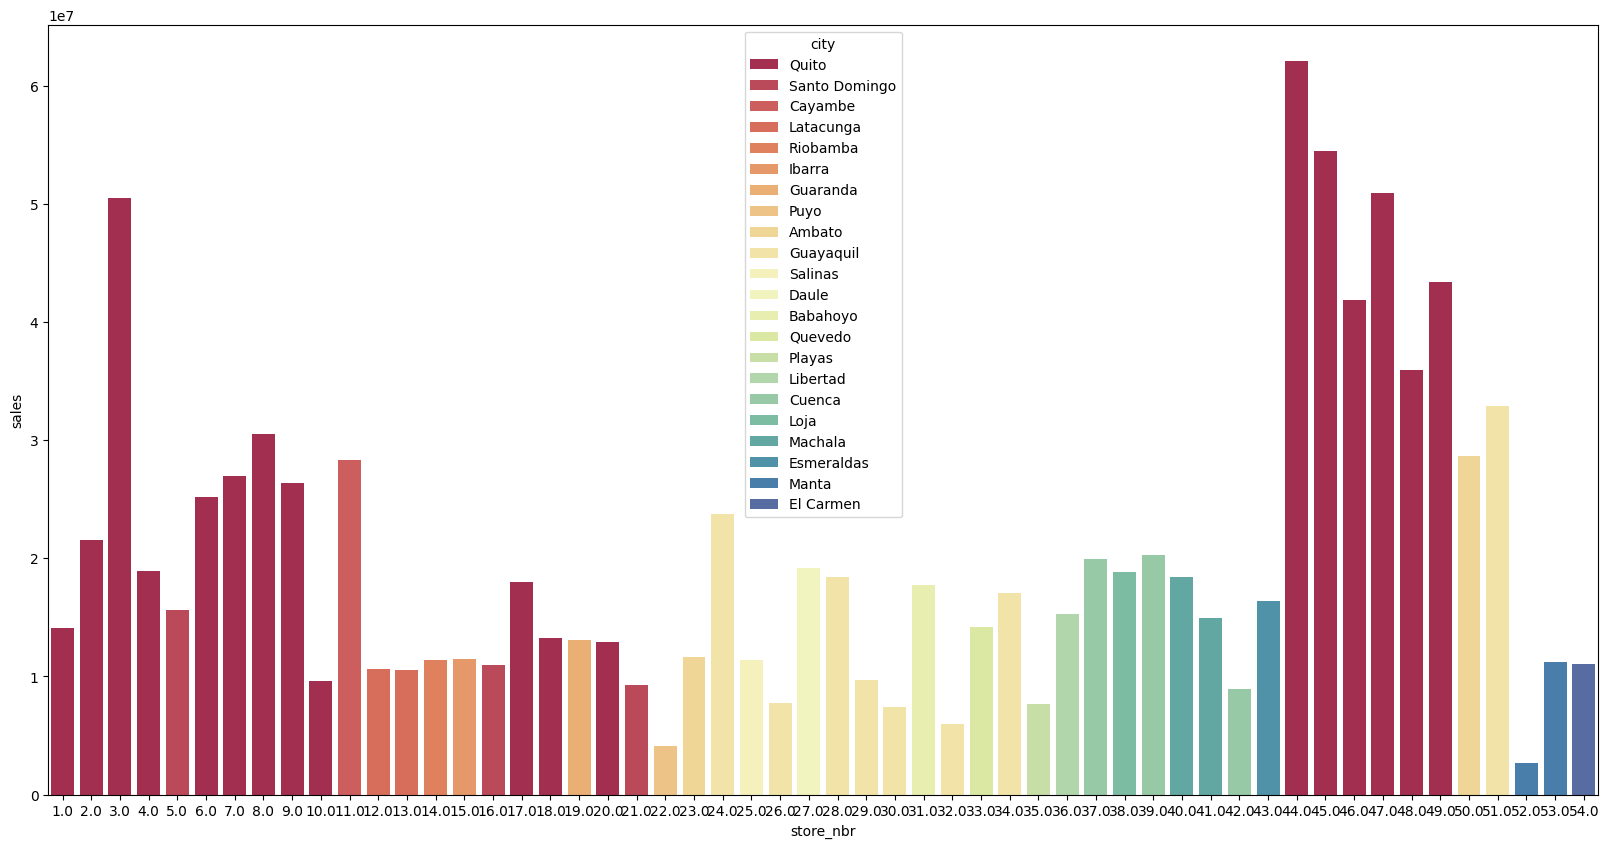

In [5]:
check = merged.groupby(['city','store_nbr'])['sales'].sum().to_frame()
check.sort_values('sales')
check.reset_index()
plt.figure(figsize = (20, 10))
sns.barplot(data = check, x = 'store_nbr', y = 'sales', hue = 'city', palette = 'Spectral')

1. Maximum stores are located in Quito that is 18.
2. At an average sales in stores located in Quito have higher sales.

<Figure size 2000x1000 with 0 Axes>

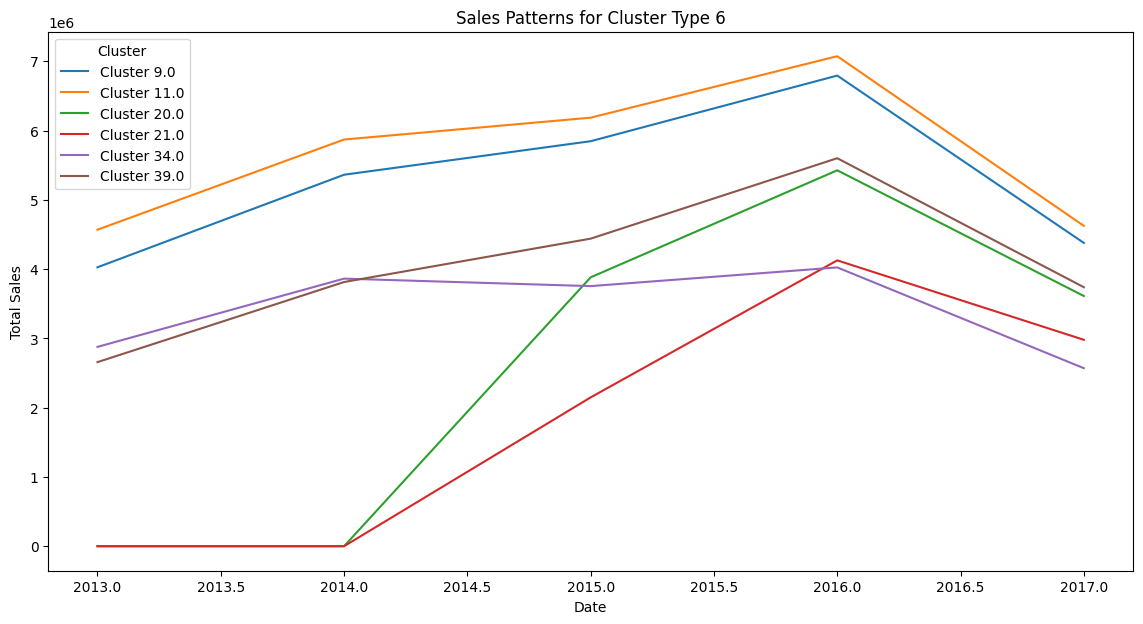

In [13]:
merged['year'] = merged['date'].dt.year
cluster = 6
filtered_df = merged[merged['cluster'] == cluster]

sales_by_cluster= filtered_df.groupby(['year', 'store_nbr'])['sales'].sum().unstack()

plt.figure(figsize=(20,10))
plt.figure(figsize=(14, 7))
for column in sales_by_cluster.columns:
    plt.plot(sales_by_cluster.index, sales_by_cluster[column], label=f'Cluster {column}')

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title(f'Sales Patterns for Cluster Type {cluster}')
plt.legend(title='Cluster')

### Train and Oil

<Axes: xlabel='dcoilwtico', ylabel='sales'>

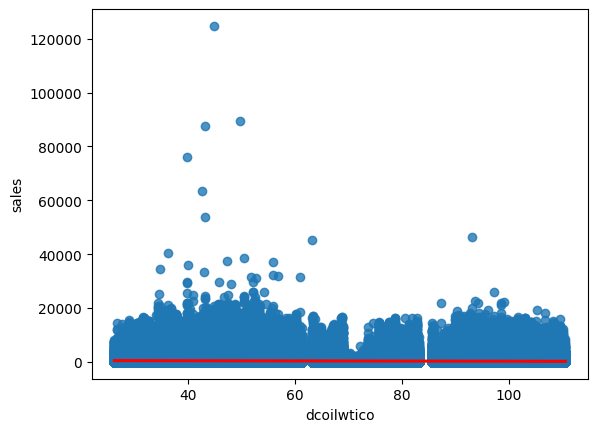

In [14]:
sns.regplot(data = merged, x='dcoilwtico', y='sales', line_kws=dict(color='r'))

In [15]:
merged[['dcoilwtico','sales']].corr()

,dcoilwtico,sales
dcoilwtico,1.000000,-0.074967
sales,-0.074967,1.000000


Sales and oil price has no correlation.

### Train and Transaction

In [4]:
merged[['sales','transactions']].corr()

,sales,transactions
sales,1.000000,0.233081
transactions,0.233081,1.000000
